### JITEN MISHRA DSC430_Assignment0902_GameOfLife
#### I have not given or received any unauthorized assistance on this assignment.¶

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
class Board:
    """
    Class to define a board
    """
    def __init__(self,s,p):
        """
        Initialize the board
        s : size of the board
        p : probabbility of values
        """
        # initialize a list for alive/dead
        # 1 as alive , 0 as dead
        self.vals = [1,0]
        
        # random creation of a board with 1's and 0's
        self.board = np.random.choice(self.vals, s*s, p=[p,1-p]).reshape(s, s)
        
        # shape of the board
        self.shape = self.board.shape
    
    def getBoard(self):
        """
        Function to return the board
        """
        return self.board
    
    def setBoard(self, board):
        """
        Function to set a board and its shape
        board : array of borad
        """
        self.board = board
        self.shape = board.shape
    
    def getShape(self):
        """
        Function to return the shape of the board
        """
        return self.shape
    
    def copyBoard(self):
        """
        Function to return a board copy
        """
        return np.copy(self.board)
    
    def __repr__(self):
        """
        Function to return the board to be displayed
        Returns the string representation of 1's and 0's
        """
        # create an empty array of same dimension
        emptyMet = np.empty(self.shape, dtype = str)
        
        # populate the empty array with */-
        # instead of 1's and 0's for output purpose
        emptyMet[self.board == 1] = '*'
        emptyMet[self.board == 0] = '-'
        
        # return the array
        return emptyMet
    

In [80]:
def simulate_gameoflife(s, p, n):
    """
    Function to simulate the game of life
    s : Desired size of board
    p : Probability of population
    n : No of iteration
    """
    # create a board
    board = conways(s,p)
    
    # advance with the board
    dictBoard, imgDict = advance(board,n)
    
    # display the string representation 
    # of the boards only if size is <= 10 for iterations <= 10
    # do not want to over polute the output console
    if(s <= 10 and n <= 10):
        displayBoards(dictBoard)
    else:
        # create Animation and plot only when the iteration 
        # is more than 10 and size more than 10
        # recomended s >= 100 and iteration n >= 100):
        # beacuse a good animation and plot requires that minimum data
        createAnimation(imgDict)
        plotBoards(imgDict)
       

In [4]:
def conways(s,p):
    """
    Function to generate the board
    s : size of board
    p : Proability of population
    """
    # create an object of board class
    board = Board(s,p)
    
    # return the board object
    return board
    

In [73]:
def advance(b,t):
    """
    Function to advance the board
    b : conways board
    t : no of iteration to be advanced
    """
    # get the shape of board
    rowCol = b.getShape()
    
    # holding the no of row and col of the grid
    nRow = rowCol[0]
    nCol = rowCol[1]
    
    bDict = {}
    imgDict = {}
    
    # loop through the provided iteration count
    for itr in range(t):
        # add the board object string representation 
        # to the dictionary
        bDict[itr] = b.__repr__()
        
        # get the updated board
        orgBoard = b.getBoard()
        
        # store board data 1's and 0's 
        # to a dictionary
        imgDict[itr] = orgBoard
        
        # create a copy of the board
        copyBoard = b.copyBoard()
        
        # update the board to migrate 1 iteration
        copyBoard = updateBoard(orgBoard, copyBoard, nRow, nCol)
    
        # break the iteration loop
        # if the board did not change anything
        if (orgBoard == copyBoard).all():
            break
        
        # set the new board 
        b.setBoard(copyBoard)
    
    # return the dictionary
    return bDict, imgDict
        

In [74]:
def updateBoard(orgBoard, copyBoard, nRow, nCol):
    """
    Function to update board per iteration
    orgBoard  : original board of the iteration
    copyBoard : board to be updated and returned
    nRow      : total row size of board
    nCol      : total coumn size of board
    """    
    # loop through the board to compute
    # the next pase of migration
    for row in range(nRow):
        for col in range(nCol):
            # check the total alive cells
            # as per neighbour cells
            totAlv = getNeighbourAlive(orgBoard,row,col,nRow,nCol)

            # apply Conway's board rules
            # live cell with neighbour live cell < 2 dies
            # live cell with neighbour live cell > 3 dies
            # live cell with neighbour live cell 2 or 3 lives
            # dead cell with neighbour live cell = 3 lives
            if orgBoard[row, col]  == 1:
                if (totAlv < 2) or (totAlv > 3):
                    copyBoard[row, col] = 0
            else:
                if totAlv == 3:
                    copyBoard[row, col] = 1
    
    # return the updated board
    return copyBoard
 

In [6]:
def getNeighbourAlive(orgBoard,row,col,nRow,nCol):
    """
    Function to calculate the alive count of Neighbours
    orgBoard : original board
    row      : current row iteration
    col      : current column iteration
    nRow     : row size of board
    nCol     : column size of board
    """
    
    # get the total alive counts of the neighbours
    totalAlv = (orgBoard[row, (col-1)%nCol] + orgBoard[(row-1)%nRow, (col-1)%nCol] +
                orgBoard[(row-1)%nRow, col] + orgBoard[(row-1)%nRow, (col+1)%nCol] +
                orgBoard[row, (col+1)%nCol] + orgBoard[(row+1)%nRow, (col+1)%nCol] +
                orgBoard[(row+1)%nRow, col] + orgBoard[(row+1)%nRow, (col-1)%nCol])
    
    # return the count
    return totalAlv
 

In [7]:
def displayBoards(bDic):
    """
    Function to display the board
    bDic   : conways board's dictionary
    """
    # loop through the dictionary
    # each value is a array of string representation of an iteration
    # traverse the array and print it
    # as the assignment asks , print only when the iteration is 10
    for key in bDic:
        print("Iteration {}".format(key))
        for arr in bDic[key]:
            for val in arr:
              print(val,end =' ')
            print('\n')
            

In [83]:
def createAnimation(dictBoard):
    """
    Function to create the simulation
    dictBoard: Dictionary holding the arrays
    """
    # get the length of dictionary
    frameCount = len(dictBoard)
    
    # get the first image data
    # to initialize the plot image
    imgData = dictBoard[0]
    
    # inline function to be used
    # by animation function
    def getImage(frameNum):
        """
        Function to set image data
        for each board array
        """
        # set the image data to plot image
        imgData = dictBoard[frameNum+1]
        img.set_data(imgData)
    
        return img
    
    # set up animation
    fig, ax = plt.subplots()
    img = ax.imshow(imgData, interpolation='nearest')
    ani = animation.FuncAnimation(fig, getImage,
                                    frames = frameCount-1,
                                    interval=10,
                                    save_count=50)
    
    # save the animation
    ani.save('CodeAni.gif',writer = 'ffmpeg', fps=7)
    
    # print a line to show animation is created
    print("*************************************************************")
    print("!!!! Animation Created Check the output File !!!!")
    print("*************************************************************")
    
    # close the plot
    plt.close()
    

In [84]:
def plotBoards(imgDict):
    """
    Function to plot the result
    """
    print("*************************************************************")
    print("Graph of life of cells below :::::::")
    x = np.arange(0,len(imgDict))
    y = np.empty(len(imgDict), dtype = int)
    
    # get the count of live cells 
    # of each board
    for arr in imgDict:
        y[arr] = np.count_nonzero(imgDict[arr] == 1)
    
    # plotting
    plt.title("Life line :: Colony of Cells")
    plt.xlabel("Iteration")
    plt.ylabel("Polulation Count")
    plt.plot(x, y, color ="red")
    plt.show()
        

**Your logic on how you updated the board ?**
* I have created a copy of the board in advance function and while computing the conways logic on the original board we kept updation the copy board and then at the end replaced the original board with the new board for next iteration.

**Values for s and p which you found that created an interesting colony of cells.?**
* I have shown 3 test case here with different s and p below
* Test case 1 : s = 10 , probablity = 0.1 and iteration = 10
* Test case 2 : s = 10 , probablity = 0.8 and iteration = 10
* Test case 3 : s = 100 , probability = 0.1 and iteration = 100
    * Test case 1 created an interesting colony of cell , it ran for all 10 iteration ( **Verification of correctness explained in below test cell markdown** )
    * Test case 2 had high probability hence the cells died in the 2nd iteration as it was over populated.
    * Test case 3 was to create a simulation (.gif) file to show the behaviour of the colony, this created a very interesting colony of cells as the board was big and iteration were more. It also shows a graphical plot of life line of population. 

In [9]:
# Test case 1: 
# 10 size borad, probablity 0.1
# and iteration 10
# this will show output as per assignment
simulate_gameoflife(10,0.1,10)

Iteration 0
* - * * - * - - - * 

* - - - - - - - - - 

- - - - - * - - * - 

- - - - - - - - - - 

* - - - - - - - - - 

- - - - - - * - - * 

- - - * - - - - - - 

* * - - - - - - - - 

- * - - - - - * - - 

* - - - - * - - - - 

Iteration 1
* - - - * - - - - * 

* * - - * - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

* - - - - - - - - - 

* * * - - - - - - - 

- * - - - - - - - - 

* - * - * - * - - * 

Iteration 2
- - - - * - - - - - 

* * - - - - - - - * 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

* - - - - - - - - - 

* - * - - - - - - - 

- - - * - - - - - * 

- - - * - * - - - * 

Iteration 3
- - - - * - - - - * 

* - - - - - - - - - 

* - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- * - - - - - - - - 

* * - - - - - - - * 

* - * * * - - - - * 

- - - * - - - - - - 

Iteration 4
- - - - - - - - - - 

* - - - - - - - - * 

- - - - - - - - 

* Test case 1 with size of board 10 , probability 0.1 and iteration 10
* The iteration competed all 10 and output displayed above.

**Verification**
* Iteration 0 : cell[0,9] is alive , among it's neighbours [0,8], [0,0], [1,8], [1,9], [1,1], [9,8], [9,9], [9,0] :: 3 are alive hence the cell live on to Iteration 1
* Iteration 0 : cell[2,5] is alive , among it's neighbours [2,4], [2,6], [3,4], [3,5], [3,6] , [1,4], [1,5], [1,6] :: 0 are alive hence the cell died on to Iteration 1
* Iteration 0 : cell[1,1] is dead , among its neighbours [1,0], [1,2], [0,0], [0,1], [0,2], [2,0], [2,1], [2,2] :: 3 are alive hence the cell came alive on to Iteration 1


In [24]:
# Test Case 2:
# size 10 , probablity 0.8 , iteration 10
simulate_gameoflife(10,0.8,10)

Iteration 0
* * * * * * - * * * 

* * * * - - * * * * 

- * * - * * - * - * 

* * - * * * * - * * 

* * - * - * * * * - 

- * * * * * * * - * 

* - * * * * * * * * 

* * - - * - * * * * 

* * * - * * * * - * 

* * * * - * * * * * 

Iteration 1
- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 

- - - - - - - - - - 



* Test case 2 wher the size of the board is 10 with probablity 0.8 and 10 iteration
* With high probablity the cells died in the 2nd iteration and it exited.

*************************************************************
!!!! Animation Created Check the output File !!!!
*************************************************************
*************************************************************
Graph of life of cells below :::::::


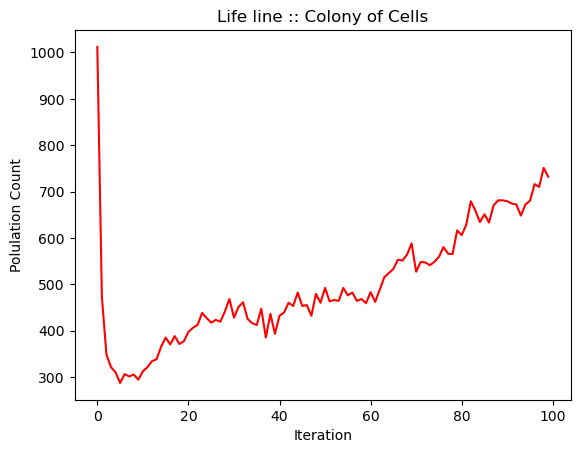

In [90]:
# Test case 3: To create simulation and show a plot
# 100 size borad, probablity 0.1
# and iteration 100
# this will not show output but create simulation
simulate_gameoflife(100,0.1,100)

* Test case 3 which created the animation file << attached with the submission >>
* Test also displays the graph of life of cells through the iteraiton

*************************************************************
!!!! Animation Created Check the output File !!!!
*************************************************************
*************************************************************
Graph of life of cells below :::::::


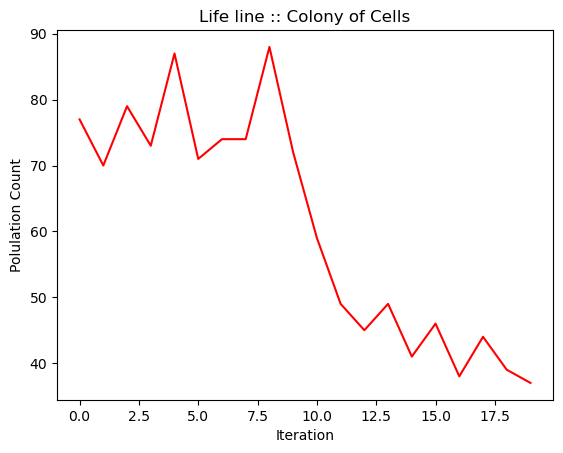

In [95]:
# Test Case 4:
# size 20 iteration 20 , probability 0.2
simulate_gameoflife(20,0.2,20)

* Test case 4 which created the animation file << attached with the submission >>
* Test also displays the graph of life of cells through the iteraiton
* The size and iteration need to be increased to see a interesting colony

*************************************************************
!!!! Animation Created Check the output File !!!!
*************************************************************
*************************************************************
Graph of life of cells below :::::::


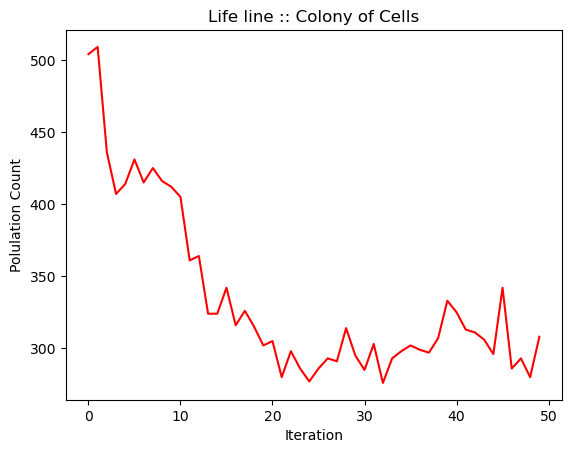

In [96]:
# Test Case 5:
# size 50 iteration 50 , probability 0.2
simulate_gameoflife(50,0.2,50)

* Test case 5 which created the animation file << attached with the submission >>
* Test also displays the graph of life of cells through the iteraiton
* The size and iteration need to be increased to see a interesting colony

*************************************************************
!!!! Animation Created Check the output File !!!!
*************************************************************
*************************************************************
Graph of life of cells below :::::::


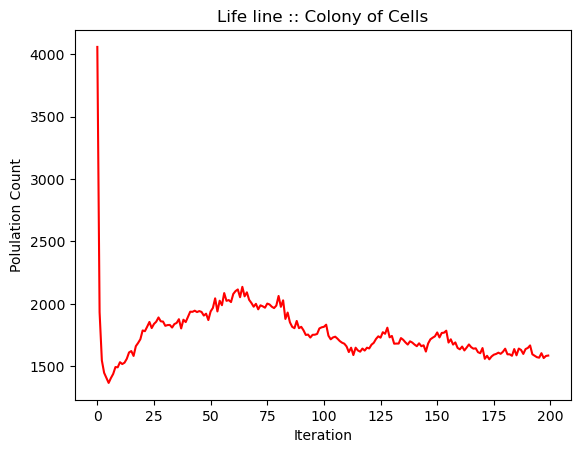

In [98]:
# Test Case 6:
# size 200 iteration 200 , probability 0.1
simulate_gameoflife(200,0.1,200)

* Test case 6 which created the animation file << attached with the submission >>
* Test also displays the graph of life of cells through the iteraiton
* Since the size and iteration are more here we see a interesting colony

**Note: The display of output or creation of animation could have acieved with a flag sent to simulate_gameoflife but that would have changed the definition of the funtion hence i did not do it and handled it in the code to display output only when size <=10 and iteraion <=10 and created simulation and graph otherwise.**